# Vehicle Price Comparisons

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pint
import pint_pandas

from race_analysis.export_data import export_df_to_latex

u = pint.UnitRegistry()

u.define('dollar = [currency] = dollars = USD')
u.define('euro = 1.09 * USD = [currency] = euros = EUR')

pint_pandas.PintType.ureg = u
pint_pandas.PintType.ureg.setup_matplotlib()

Q_ = u.Quantity

## Define Parameters

In [14]:
P_KEY = 'Power'
M_KEY = 'Mass'
PRICE = 'Price'

vehicle_specs = {
    "Red Bull Racing RB20 F1": {        # https://www.redbullracing.com/int-en/cars/rb20
        P_KEY: Q_(1080, u.hp),
        M_KEY: Q_(798, u.kg),
        PRICE: Q_(15000000, u.EUR),     # https://www.redbull.com/se-en/theredbulletin/what-does-a-formula-1-car-cost
    },
    "RUSH SR": {                        # https://rushautoworks.com/car_post/rush-sr/
        P_KEY: Q_(145, u.hp),
        M_KEY: Q_(513, u.kg),
        PRICE: Q_(39875, u.USD),
    },
    "RUSH SRX (Unreleased)": {          # https://rushautoworks.com/car_post/rush-srx/
        P_KEY: Q_(230, u.hp),           # 220 whp (Min) with 30whp on PTP (180 seconds per session)
        M_KEY: Q_(1195, u.lb),
        PRICE: Q_(83675, u.USD),
    },
    "Bugatti Chiron": {                 # https://en.wikipedia.org/wiki/Bugatti_Chiron
        P_KEY: Q_(1103, u.kW),
        M_KEY: Q_(1996, u.kg),
        PRICE: Q_(3300000, u.USD),
    },
    "Porsche 911 Turbo": {              # https://www.porsche.com/usa/models/911/911-turbo-models/911-turbo/
        P_KEY: Q_(572, u.hp),
        M_KEY: Q_(3635, u.lb),
        PRICE: Q_(197200, u.USD),
    },
    "Porsche 911 Carerra": {            # https://www.porsche.com/usa/models/911/911-models/carrera/
        P_KEY: Q_(379, u.hp),
        M_KEY: Q_(3354, u.lb),
        PRICE: Q_(114400, u.USD),
    },
    "BMW M3 Competition": {             # https://www.bmwusa.com/vehicles/m-models/m3-sedan/overview.html#performance
        P_KEY: Q_(503, u.hp),
        M_KEY: Q_(3990, u.lb),
        PRICE: Q_(76995, u.USD)
    },
    "BMW M4 Competition": {             # https://www.bmwusa.com/vehicles/m-series/bmw-4-series-m-models/bmw-m4-coupe.html#technical-highlights
        P_KEY: Q_(523, u.hp),
        M_KEY: Q_(3640, u.lb),
        PRICE: Q_(84195, u.USD)
    },
    "Corvette 1LT": {                   # https://www.chevrolet.com/shopping/configurator/performance/2024/corvette/corvette/compare?make=chevrolet
        P_KEY: Q_(490, u.hp),
        M_KEY: Q_(3366, u.lb),
        PRICE: Q_(69995, u.USD)
    },
    "Honda Civic Type R": {             # https://automobiles.honda.com/civic-type-r#
        P_KEY: Q_(315, u.hp),
        M_KEY: Q_(3188, u.lb),
        PRICE: Q_(44795, u.USD),
    },
    "Lotus Emira" : {                   # https://media.lotuscars.com/en/models/emira.html
        P_KEY: Q_(360, u.hp),
        M_KEY: Q_(1405, u.kg),
        PRICE: Q_(99900, u.USD),
    },
    "Ferrari 488 GTB": {                # https://www.ferrari.com/en-EN/auto/ferrari-488-gtb
        P_KEY: Q_(492, u.kW),
        M_KEY: Q_(1475, u.kg),
        PRICE: Q_(280900, u.USD),
    },
    "Audi R8 Coupé V10": {              # https://www.audi-mediacenter.com/en/audi-r8-coupe-v10-performance-quattro-14430
        P_KEY: Q_(456, u.kW),
        M_KEY: Q_(1670, u.kg),
        PRICE: Q_(158600, u.USD),
    },
    "Mercedes AMG GT 55 Coupe": {       # https://www.mbusa.com/en/vehicles/class/amg-gt-2-door/mercedes-amg-gt-2-door-coupe
        P_KEY: Q_(469, u.hp),
        M_KEY: Q_(4343, u.lb),
        PRICE: Q_(134900, u.USD),
    },
    "McLaren P1": {                     # https://cars.mclaren.com/us-en/legacy/mclaren-p1/specification
        P_KEY: Q_(903, u.hp),
        M_KEY: Q_(1490, u.kg),
        PRICE: Q_(1150000, u.USD),
    },
    "Tesla Model 3 Performance": {      # https://www.tesla.com/model3-performance
        P_KEY: Q_(510, u.hp),
        M_KEY: Q_(4054, u.lb),
        PRICE: Q_(54990, u.USD),
    },
    "Tesla Model 3 Long Range AWD": {   # https://www.tesla.com/model3
        P_KEY: Q_(393, u.hp),
        M_KEY: Q_(4030, u.lb),
        PRICE: Q_(47740, u.USD),
    },
    "Tesla Model 3 Rear-Wheel Drive": { # https://www.tesla.com/model3
        P_KEY: Q_(271, u.hp),
        M_KEY: Q_(3891, u.lb),
        PRICE: Q_(38990, u.USD),
    },
    "McLaren 750s": {                   # https://cars.mclaren.com/us-en/750s
        P_KEY: Q_(740, u.hp),
        M_KEY: Q_(1389, u.kg),
        PRICE: Q_(329500, u.USD),
    },
    # "": {
    #     P_KEY: Q_( , u.hp),
    #     M_KEY: Q_( , u.lb),
    #     PRICE: Q_( , u.USD),
    # },
    # "Mercedes AMG GT 63 Coupe": {   # https://www.mbusa.com/en/vehicles/class/amg-gt-2-door/mercedes-amg-gt-2-door-coupe
    #     P_KEY: Q_(577, u.hp),
    #     M_KEY: Q_(4343, u.lb),
    #     PRICE: Q_(175900, u.USD),
    # },
}

final_units = u.watts / u.kg

## Format the Data Visually

In [15]:
data_simple = [
    {
        'Vehicle': vehicle,
        'Mass': specs[M_KEY].to(u.kg),
        'Power': specs[P_KEY].to(u.kilowatts),
        'Price': specs[PRICE].to(u.USD),
    } for vehicle, specs in vehicle_specs.items()
]


data_simple_df = pd.DataFrame(data_simple)
data_simple_sorted = data_simple_df.sort_values(by=M_KEY, ascending=True)

print(
    export_df_to_latex(
        df=data_simple_sorted,
        numeric_format={'Power': 'ROUND(2)', 'Mass': 'ROUND(0)', 'Price': 'ROUND(0)'},
    )
)

\begin{table*}
\begin{center}
\begin{tabular}{llll}
\toprule
Vehicle & Mass [kilogram] & Power [kilowatt] & Price [dollar] \\
\midrule
RUSH SR & 513 & 108.13 & 39,875 \\
RUSH SRX (Unreleased) & 542 & 171.51 & 83,675 \\
Red Bull Racing RB20 F1 & 798 & 805.36 & 16,350,000 \\
McLaren 750s & 1,389 & 551.82 & 329,500 \\
Lotus Emira & 1,405 & 268.45 & 99,900 \\
Honda Civic Type R & 1,446 & 234.90 & 44,795 \\
Ferrari 488 GTB & 1,475 & 492.00 & 280,900 \\
McLaren P1 & 1,490 & 673.37 & 1,150,000 \\
Porsche 911 Carerra & 1,521 & 282.62 & 114,400 \\
Corvette 1LT & 1,527 & 365.39 & 69,995 \\
Porsche 911 Turbo & 1,649 & 426.54 & 197,200 \\
BMW M4 Competition & 1,651 & 390.00 & 84,195 \\
Audi R8 Coupé V10 & 1,670 & 456.00 & 158,600 \\
Tesla Model 3 Rear-Wheel Drive & 1,765 & 202.08 & 38,990 \\
BMW M3 Competition & 1,810 & 375.09 & 76,995 \\
Tesla Model 3 Long Range AWD & 1,828 & 293.06 & 47,740 \\
Tesla Model 3 Performance & 1,839 & 380.31 & 54,990 \\
Mercedes AMG GT 55 Coupe & 1,970 & 349.73 & 134,

## Perform Analysis

In [16]:
data = [
    {
        'Vehicle': vehicle,
        'Power to Mass': (specs[P_KEY] / specs[M_KEY]).to(final_units),
        'PTM to Price': ((specs[P_KEY] / specs[M_KEY]) / specs[PRICE]).to(final_units / u.USD),
    } for vehicle, specs in vehicle_specs.items()
]

vehicle_df = pd.DataFrame(data)
vehicle_df_sorted = vehicle_df.sort_values(by='Power to Mass', ascending=False)

print(export_df_to_latex(
    df=vehicle_df_sorted,
    numeric_format={'Power to Mass': 'ROUND', 'PTM to Price': 'SCIENTIFIC'})
)

\begin{table*}
\begin{center}
\begin{tabular}{lll}
\toprule
Vehicle & Power to Mass [watt / kilogram] & PTM to Price [watt / dollar / kilogram] \\
\midrule
Red Bull Racing RB20 F1 & 1,009.22 & $6.17 \times 10^{-5}$ \\
Bugatti Chiron & 552.61 & $1.67 \times 10^{-4}$ \\
McLaren P1 & 451.92 & $3.93 \times 10^{-4}$ \\
McLaren 750s & 397.28 & $1.21 \times 10^{-3}$ \\
Ferrari 488 GTB & 333.56 & $1.19 \times 10^{-3}$ \\
RUSH SRX (Unreleased) & 316.42 & $3.78 \times 10^{-3}$ \\
Audi R8 Coupé V10 & 273.05 & $1.72 \times 10^{-3}$ \\
Porsche 911 Turbo & 258.70 & $1.31 \times 10^{-3}$ \\
Corvette 1LT & 239.32 & $3.42 \times 10^{-3}$ \\
BMW M4 Competition & 236.21 & $2.81 \times 10^{-3}$ \\
RUSH SR & 210.77 & $5.29 \times 10^{-3}$ \\
BMW M3 Competition & 207.25 & $2.69 \times 10^{-3}$ \\
Tesla Model 3 Performance & 206.82 & $3.76 \times 10^{-3}$ \\
Lotus Emira & 191.07 & $1.91 \times 10^{-3}$ \\
Porsche 911 Carerra & 185.77 & $1.62 \times 10^{-3}$ \\
Mercedes AMG GT 55 Coupe & 177.53 & $1.32 \times

| Vehicle                        | Power to Mass                      | PTM to Price                                   |
|:-------------------------------|:-----------------------------------|:-----------------------------------------------|
| Red Bull Racing RB20 F1        | 1009.2178713143505 watt / kilogram | 6.17258636889511e-05 watt / dollar / kilogram  |
| RUSH SR                        | 210.77286818602175 watt / kilogram | 0.0052858399545083826 watt / dollar / kilogram |
| RUSH SRX (Unreleased)          | 316.4158706108787 watt / kilogram  | 0.003781486353282088 watt / dollar / kilogram  |
| Bugatti Chiron                 | 552.6052104208417 watt / kilogram  | 0.000167456124369952 watt / dollar / kilogram  |
| Porsche 911 Turbo              | 258.69613563466305 watt / kilogram | 0.0013118465295875407 watt / dollar / kilogram |
| Porsche 911 Carerra            | 185.76952876386406 watt / kilogram | 0.001623859517166644 watt / dollar / kilogram  |
| BMW M3 Competition            

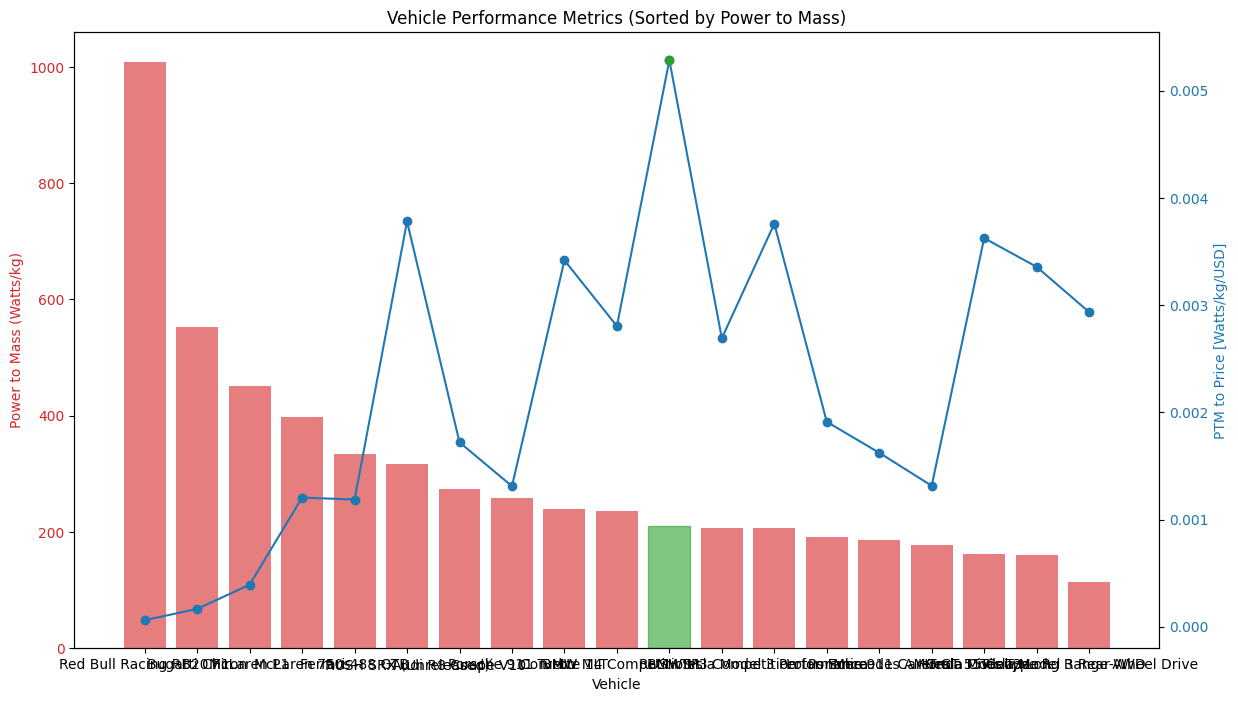

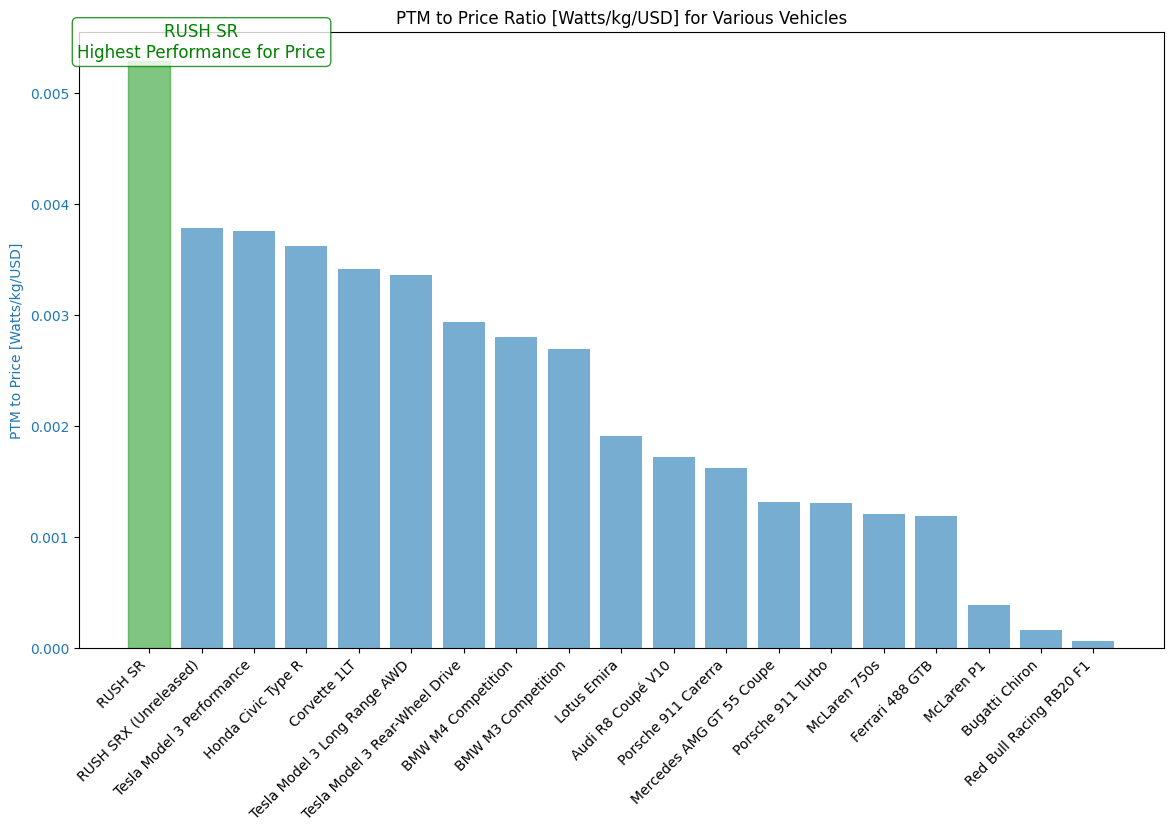

In [17]:
print(vehicle_df.to_markdown(index=False))

# Plotting the sorted data with RUSH SR highlighted
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
highlight_color = 'tab:green'
ax1.set_xlabel('Vehicle')
ax1.set_ylabel('Power to Mass (Watts/kg)', color=color)

bars = ax1.bar(vehicle_df_sorted['Vehicle'], vehicle_df_sorted['Power to Mass'], color=color, alpha=0.6)
for bar, vehicle in zip(bars, vehicle_df_sorted['Vehicle']):
    if vehicle == "RUSH SR":
        bar.set_color(highlight_color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('PTM to Price [Watts/kg/USD]', color=color)
line, = ax2.plot(vehicle_df_sorted['Vehicle'], vehicle_df_sorted['PTM to Price'], color=color, marker='o')
for i, vehicle in enumerate(vehicle_df_sorted['Vehicle']):
    if vehicle == "RUSH SR":
        ax2.plot(vehicle, vehicle_df_sorted['PTM to Price'].iloc[i], color=highlight_color, marker='o')

ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
plt.title('Vehicle Performance Metrics (Sorted by Power to Mass)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()



# Creating a bar plot to show the PTM to Price ratio for various vehicles, highlighting RUSH SR

vehicle_df_sorted = vehicle_df.sort_values(by='PTM to Price', ascending=False)

# Plotting the sorted data with RUSH SR highlighted
fig, ax = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
highlight_color = 'tab:green'
ax.set_ylabel('PTM to Price [Watts/kg/USD]', color=color)

bars = ax.bar(vehicle_df_sorted['Vehicle'], vehicle_df_sorted['PTM to Price'], color=color, alpha=0.6)
for bar, vehicle in zip(bars, vehicle_df_sorted['Vehicle']):
    if vehicle == "RUSH SR":
        bar.set_color(highlight_color)

ax.tick_params(axis='y', labelcolor=color)

# Adding a text box for RUSH SR
rush_sr1_index = vehicle_df_sorted[vehicle_df_sorted['Vehicle'] == "RUSH SR"].index[0]
rush_sr1_ptm_price = vehicle_df_sorted.loc[rush_sr1_index, 'PTM to Price']

bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='white', alpha=0.8)
ax.text(rush_sr1_index, rush_sr1_ptm_price, "RUSH SR\nHighest Performance for Price", ha="center", va="bottom", size=12, bbox=bbox_props, color='green')

plt.title('PTM to Price Ratio [Watts/kg/USD] for Various Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()
